In [1]:
from glob import glob 
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imageio

input_dataset_path = './Data/Original/'
output_dataset_path = './Data/Output/'

In [24]:
mtx = np.array([[5.18460289e+03, 0.00000000e+00, 8.93439037e+02],
 [0.00000000e+00, 4.99241883e+03, 1.87367393e+02],
 [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])
dist = np.array([[-3.02398281e-01, -4.96879202e+00,  3.38606915e-02,  5.99562903e-03, 1.22428270e+01]])

mtx_gt = np.array([[2.501501083289876e+03, 0.00000000e+00, 5.201581619358745e+02],
 [0.00000000e+00, 2.502398082649436e+03, 5.725795845858204e+02],
 [0, 0, 1.00000000e+00]])

dist_gt = np.array([[-0.1456, -0.1237,  0,  0, 0]])

H = np.array([[ 1.59314223e+00,-3.39848873e-03,-7.47812129e+01],[6.00408489e-03, 1.57792749e+00,-2.22786297e+02],[1.41525738e-05,-7.16701000e-06,1.00000000e+00]])

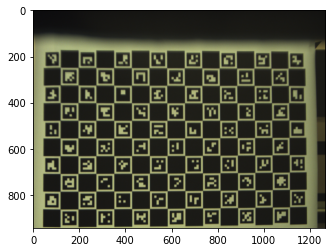

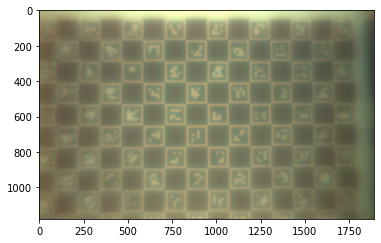

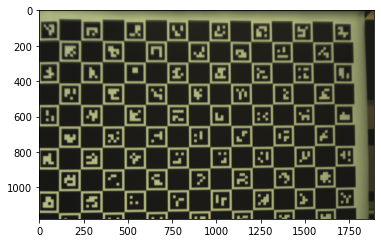

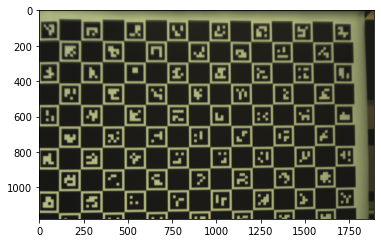

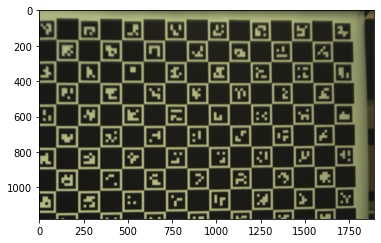

In [39]:
img_gt = plt.imread('./Data/Original/gt.png')
img_meta = plt.imread('./Data/Original/metalens.png')

def get_undist_img(img,mtx,dist):
    h,  w = img.shape[:2]
    newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
    # undistort
    dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
    # crop the image
    x, y, w, h = roi
    dst = dst[y:y+h, x:x+w]
    return dst


img_meta = get_undist_img(img_meta,mtx,dist)
img_gt = get_undist_img(img_gt,mtx_gt,dist_gt)
img_gt = np.fliplr(img_gt)

plt.figure()
plt.imshow(img_gt)

plt.figure()
plt.imshow(img_meta)


img_gt = np.uint8(img_gt*255)
ret1, corners1 = cv2.findChessboardCorners(img_gt, (14,9))



def do_homography(gt_img,undist_meta,H):
    img_warp = cv2.warpPerspective(gt_img, H, (undist_meta.shape[1], undist_meta.shape[0]))
    plt.figure()
    plt.imshow(img_warp)
    return img_warp
img_gt = do_homography(img_gt,img_meta,H)

imageio.imwrite('new_unwarp_gt.png', np.uint8(img_gt))
imageio.imwrite('new_undist_meta.png', np.uint8(img_meta*255))


def crop_offset(x,y,img):
    h,w = img.shape[:2]
    if x > 0:
        indice_w = [x,w]
    else:
        indice_w = [0,w+x]
    if y > 0:
        indice_h = [y,h]
    else:
        indice_h = [0,h+y]
    return img[indice_h[0]:indice_h[1],indice_w[0]:indice_w[1]]


plt.figure()
plt.imshow(img_gt)

img_gt = crop_offset(17,5,img_gt)
img_gt = cv2.resize(img_gt,(img_meta.shape[1],img_meta.shape[0]))

#img_gt = crop_offset(-6,0,img_gt)
#img_gt = cv2.resize(img_gt,(img_meta.shape[1],img_meta.shape[0]))
imageio.imwrite('new_unwarp_cropped_gt.png', np.uint8(img_gt))

plt.figure()
plt.imshow(img_gt)


./Data/Original/GT/1001-19-49-28.653.png
./Data/Original/metalens/1001-19-49-28.601.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.78039217
0.7490196228027344
0.7490196228027344


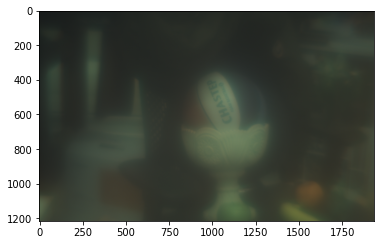

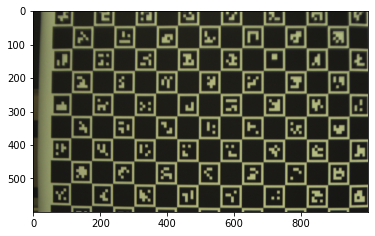

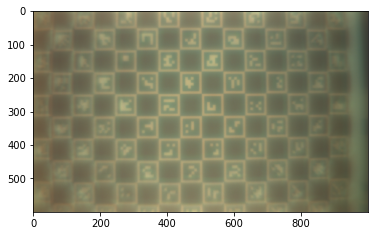

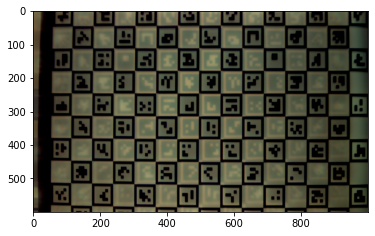

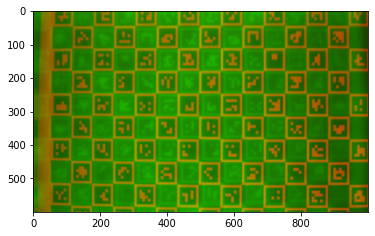

In [41]:
gt_path_list = sorted(glob(input_dataset_path+'GT/*'))
meta_path_list = sorted(glob(input_dataset_path+'metalens/*'))
print(gt_path_list[0])
print(meta_path_list[0])

def cvt_raw2rgb(img_path):
    imageRaw = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE | cv2.IMREAD_ANYDEPTH)
    img_bgr = cv2.cvtColor(imageRaw, cv2.COLOR_BAYER_BG2BGR)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    return img_rgb

img_gt = cvt_raw2rgb(meta_path_list[0])
plt.imshow(img_gt)


def images_alignment(img_gt,img_meta):
    # Crop FoV
    img_gt = img_gt[205:890,20:1230]
    img_meta = img_meta[80:,:]
    # Match GT size to Meta
    w,h,c = img_meta.shape
    #print(w,h)
    w = 600
    h = 1000
    img_gt = cv2.resize(img_gt,(h,w))
    img_meta = cv2.resize(img_meta,(h,w))

    return img_gt, img_meta

i = 1
img_gt = cvt_raw2rgb(gt_path_list[i])
img_meta = cvt_raw2rgb(meta_path_list[i])

img_gt = plt.imread('./Data/Original/gt.png')
img_meta = plt.imread('./Data/Original/metalens.png')
print(img_gt.max())
img_gt,img_meta = images_alignment(img_gt,img_meta)

img_new = np.zeros(img_gt.shape)#.astype(np.uint8)
img_new[...,0] = img_gt[...,0]
print(img_new[...,0].max())
img_new[...,1] = img_meta[...,1]
print(img_new[...,1:].max())

plt.figure()
plt.imshow(img_gt)
plt.figure()
plt.imshow(img_meta)
plt.figure()
plt.imshow(img_meta-img_gt)
plt.figure()
plt.imshow(img_new)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


/var/folders/04/x__0y76s1vd7_tjgq64bshr40000gn/T/ipykernel_90557/1613498561.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44


KeyboardInterrupt: 

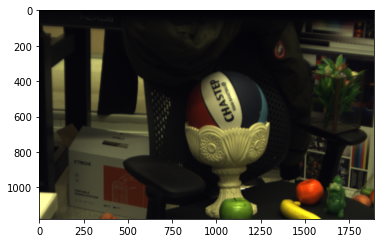

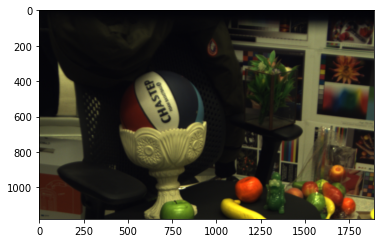

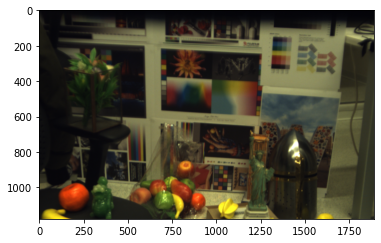

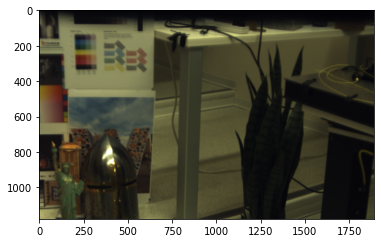

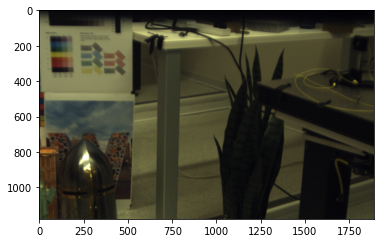

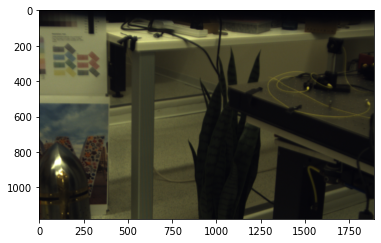

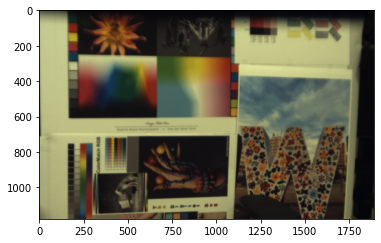

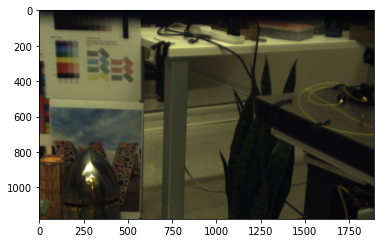

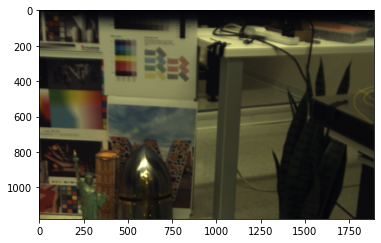

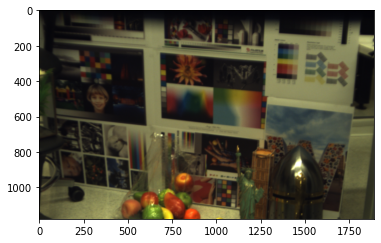

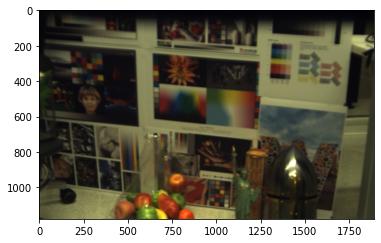

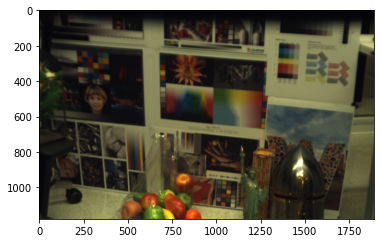

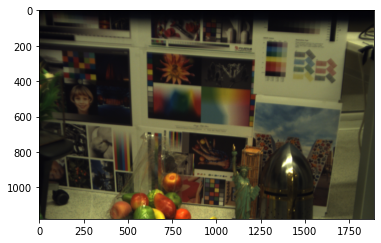

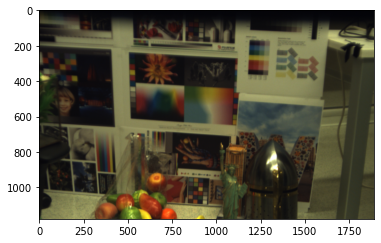

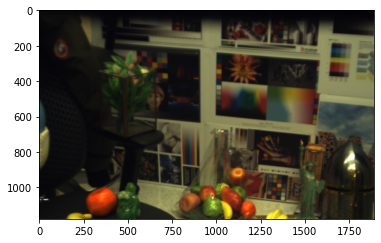

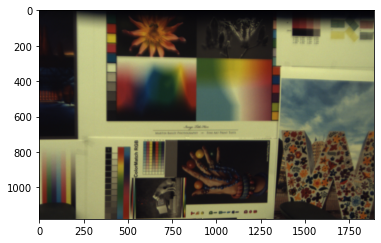

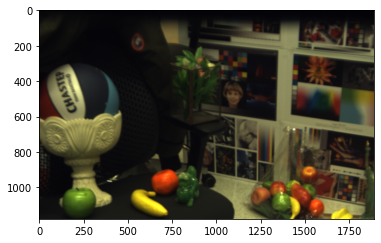

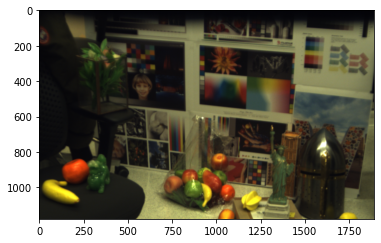

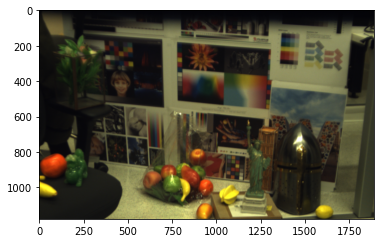

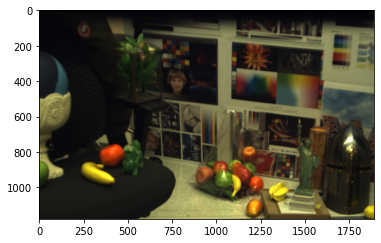

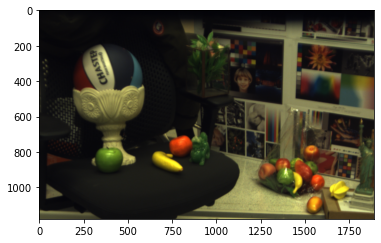

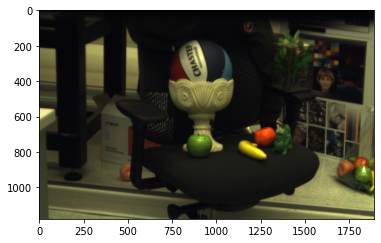

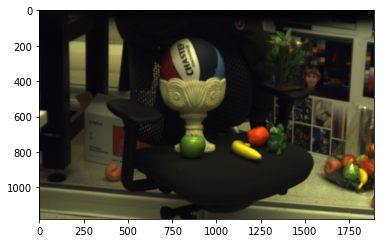

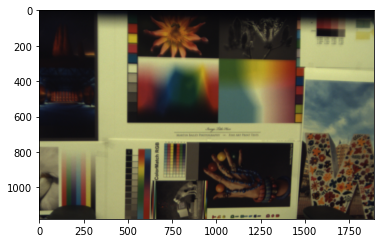

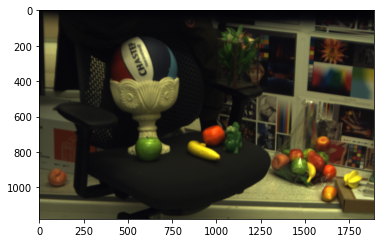

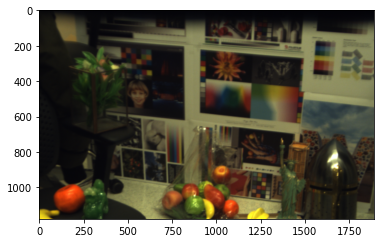

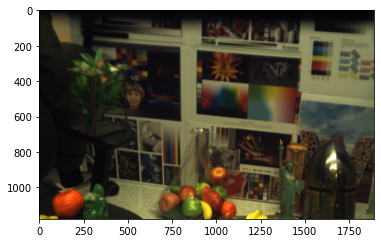

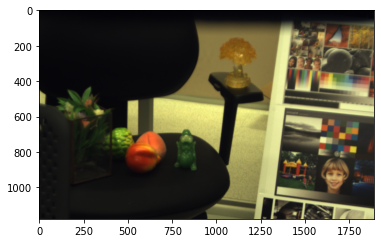

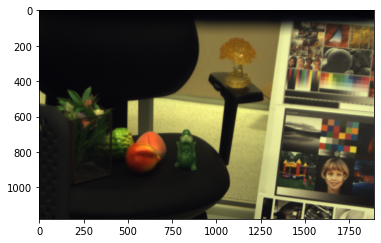

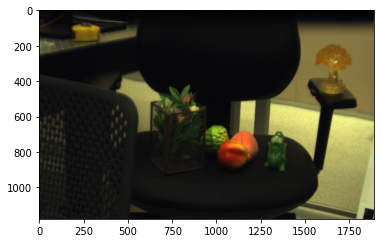

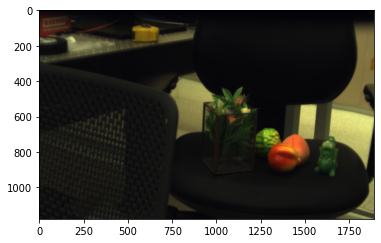

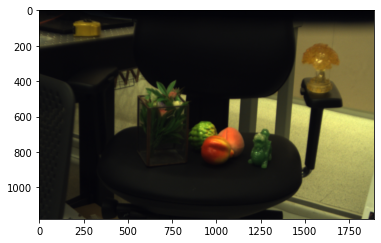

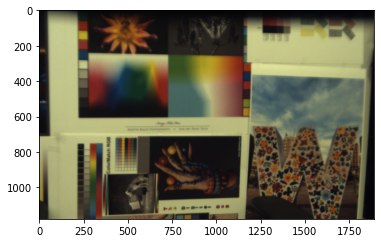

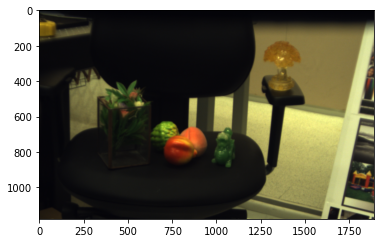

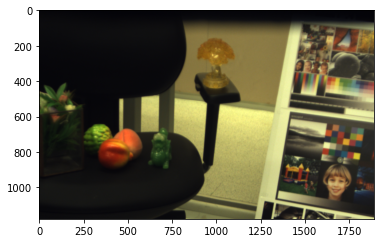

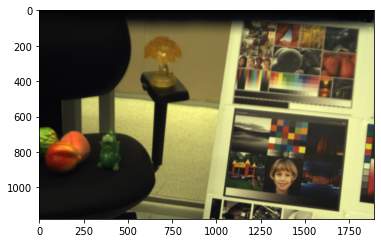

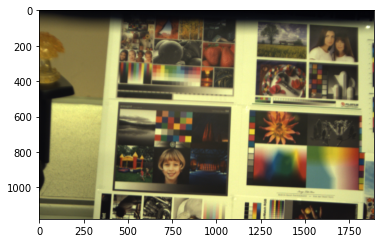

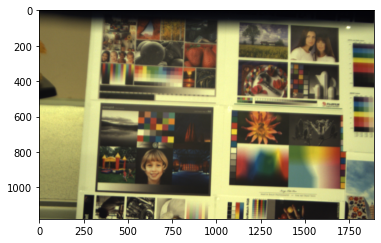

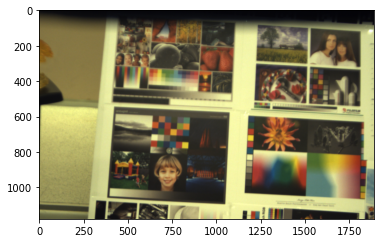

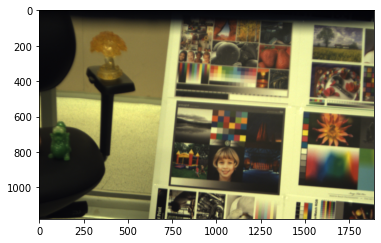

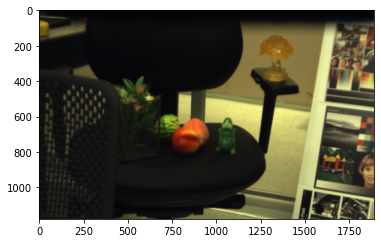

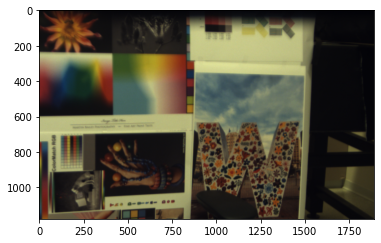

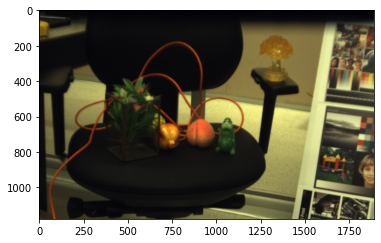

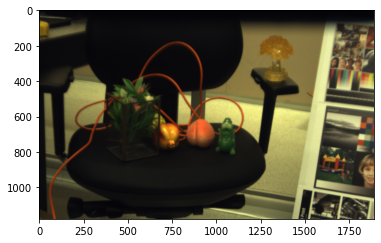

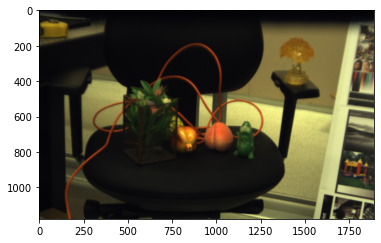

In [47]:
def generate_dataset(input_dataset_path,output_dataset_path):
    gt_path_list = sorted(glob(input_dataset_path+'GT/*'))
    meta_path_list = sorted(glob(input_dataset_path+'metalens/*'))
    output_res_x = 1000
    output_res_y = 600
    for i in range(0,len(gt_path_list)):
        print(i)
        img_gt = cvt_raw2rgb(gt_path_list[i])
        img_meta = cvt_raw2rgb(meta_path_list[i])
        img_meta = get_undist_img(img_meta,mtx,dist)
        img_gt = get_undist_img(img_gt,mtx_gt,dist_gt)
        img_gt = np.fliplr(img_gt)

        img_gt = do_homography(img_gt,img_meta,H)

        img_gt = crop_offset(31,5,img_gt)
        img_gt = cv2.resize(img_gt,(output_res_x,output_res_y))
        img_meta = cv2.resize(img_meta,(output_res_x,output_res_y))


        
        #img_gt,img_meta = images_alignment(img_gt,img_meta)
        imageio.imwrite(output_dataset_path+"GT/{}.png".format(i), np.uint8(img_gt))
        imageio.imwrite(output_dataset_path+"metalens/{}.png".format(i), np.uint8(img_meta))

generate_dataset(input_dataset_path,output_dataset_path)